In [ ]:
print('Hare Krishna')

Hare Krishna


In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL

In [ ]:
#Example: qiskit - HHL 
matrix = np.array([[1, -1/3], [-1/3, 1]])
#Vector (|b>)
vector = np.array([1, 0])

<ipython-input-5-c06a1af8a958>:4: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  hhl = HHL(1e-3, quantum_instance=backend)


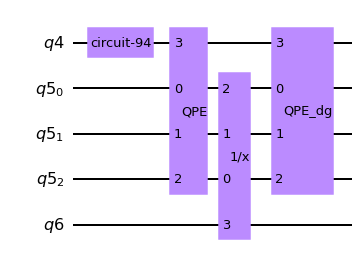

In [ ]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator')
hhl = HHL(1e-3, quantum_instance=backend)
accurate_solution = hhl.solve(matrix, vector)
accurate_solution.state.draw('mpl')
#print(accurate_solution.state)

In [ ]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(accurate_solution.state).data
# Extract the right vector components. 10000 corresponds to the index 16 and 10001 corresponds to the index 17
naive_full_vector = np.array([naive_sv[0b10000], naive_sv[0b10001]])
#print('raw solution vector:', naive_full_vector)
naive_full_vector = np.real(naive_full_vector)
norm_rat = accurate_solution.euclidean_norm/np.linalg.norm(naive_full_vector)
#print('eucl_norm = ', accurate_solution.euclidean_norm, ' np.linalg.norm(naive_full_vector) = ', np.linalg.norm(naive_full_vector), ', normalising ratio = ', norm_rat)
sol_vector = norm_rat * naive_full_vector
#print('solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))

print('\nMatrix (A):\t{}\n\t\t{}'.format(matrix[0], matrix[1]))
print('\nVector (|b>) :\t{}'.format(vector))
print('\nResult (x)   =\t{}'.format(sol_vector))
print('eucl_norm(x) =\t{:6.4f}\n'.format(accurate_solution.euclidean_norm))


Matrix (A):	[ 1.         -0.33333333]
		[-0.33333333  1.        ]

Vector (|b>) :	[1 0]

Result (x)   =	[1.125 0.375]
eucl_norm(x) =	1.1859



#### A survey on HHL algorithm: From theory to application in quantum machine 

---

Table 2  Experimental results verification

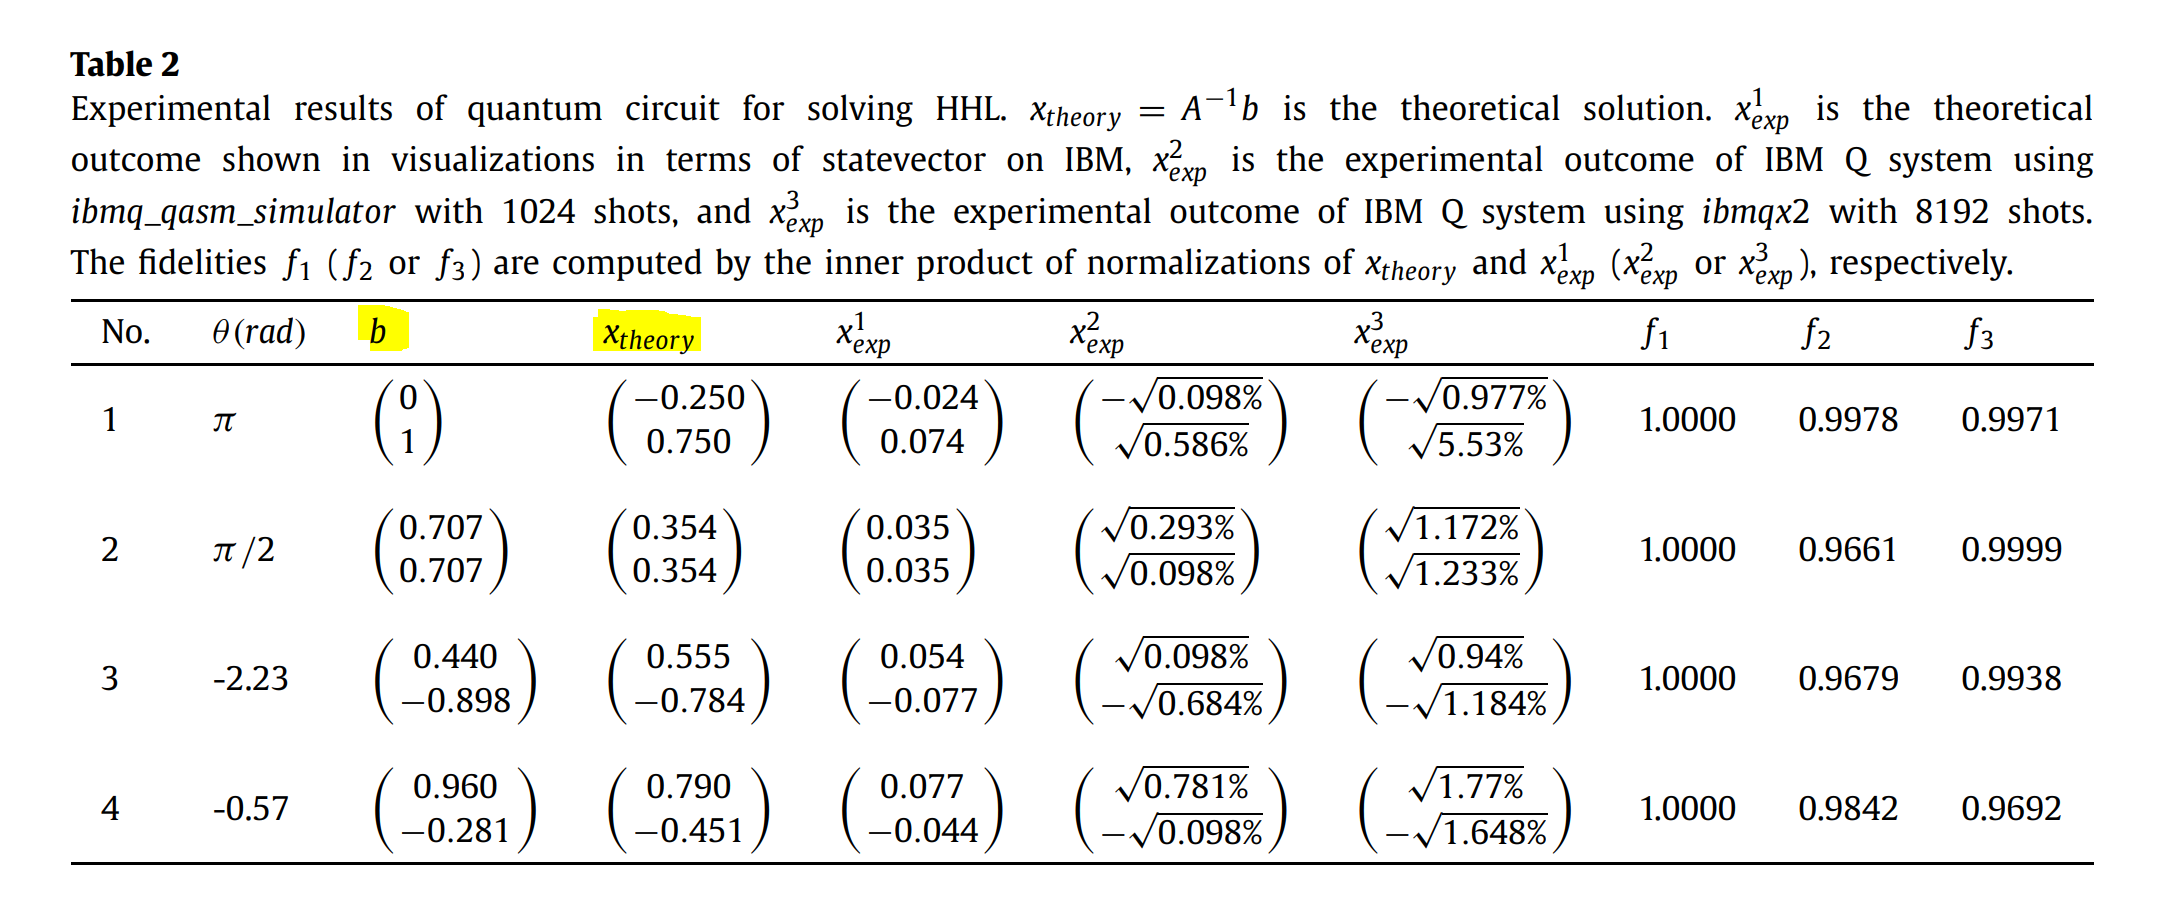

In [ ]:
#theta = pi
matrix = np.array([[1.5, 0.5], [0.5, 1.5]])
#Vector (|b>)
vector1 = np.array([0, 1])


In [ ]:
#theta = pi/2
matrix = np.array([[1.5, 0.5], [0.5, 1.5]])
#Vector (|b>)
vector2 = np.array([0.707, 0.707])


In [ ]:
#theta = -2.23
matrix = np.array([[1.5, 0.5], [0.5, 1.5]])
#Vector (|b>)
vector3 = np.array([0.440, -0.898])


In [ ]:
#theta = -0.57
matrix = np.array([[1.5, 0.5], [0.5, 1.5]])
#Vector (|b>)
vector4 = np.array([0.960, -0.281])


In [ ]:
vector_list = [vector1, vector2, vector3, vector4]
print(vector_list)

[array([0, 1]), array([0.707, 0.707]), array([ 0.44 , -0.898]), array([ 0.96 , -0.281])]


In [ ]:
from qiskit import Aer
from qiskit.quantum_info import Statevector

backend = Aer.get_backend('aer_simulator')
hhl = HHL(1e-3, quantum_instance=backend)


<ipython-input-12-6a1a9d49a2c3>:5: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  hhl = HHL(1e-3, quantum_instance=backend)


In [ ]:
from numpy.testing import assert_equal
result_list = []
eucl_norm_list = []
for each in vector_list:
  accurate_solution = hhl.solve(matrix, each)
  naive_sv = Statevector(accurate_solution.state).data
  # Extract the right vector components. 10000 corresponds to the index 16 and 10001 corresponds to the index 17
  naive_full_vector = np.array([naive_sv[0b10000], naive_sv[0b10001]])
  #print('raw solution vector:', naive_full_vector)
  naive_full_vector = np.real(naive_full_vector)
  norm_rat = accurate_solution.euclidean_norm/np.linalg.norm(naive_full_vector)
  sol_vector = norm_rat * naive_full_vector
  result_list.append(sol_vector)
  eucl_norm_list.append(accurate_solution.euclidean_norm)

with np.printoptions(precision= 3):
  print('\nMatrix (A):\t[{}\n\t\t {}]\n'.format(matrix[0], matrix[1]))
  print('-----------------------------------------------------------------')
  print('|  Vector (|b>)\t\t  Result (x)\t\t eucl_norm(x)\t|')
  print('-----------------------------------------------------------------')

  for x in range(len(vector_list)):
    if(x == 0):
      print('|  ', vector_list[x], '\t\t', result_list[x], '\t\t', '{:5.3f}'.format(eucl_norm_list[x]), '\t\t|')
    elif(x == 1):
      print('|  ', vector_list[x], '\t', result_list[x], '\t\t', '{:5.3f}'.format(eucl_norm_list[x]), '\t\t|')
    else:
      print('|  ', vector_list[x], '\t', result_list[x], '\t', '{:5.3f}'.format(eucl_norm_list[x]), '\t\t|')
  print('-----------------------------------------------------------------')


Matrix (A):	[[1.5 0.5]
		 [0.5 1.5]]

-----------------------------------------------------------------
|  Vector (|b>)		  Result (x)		 eucl_norm(x)	|
-----------------------------------------------------------------
|   [0 1] 		 [-0.25  0.75] 		 0.791 		|
|   [0.707 0.707] 	 [0.354 0.354] 		 0.500 		|
|   [ 0.44  -0.898] 	 [ 0.554 -0.783] 	 0.960 		|
|   [ 0.96  -0.281] 	 [ 0.79  -0.451] 	 0.910 		|
-----------------------------------------------------------------


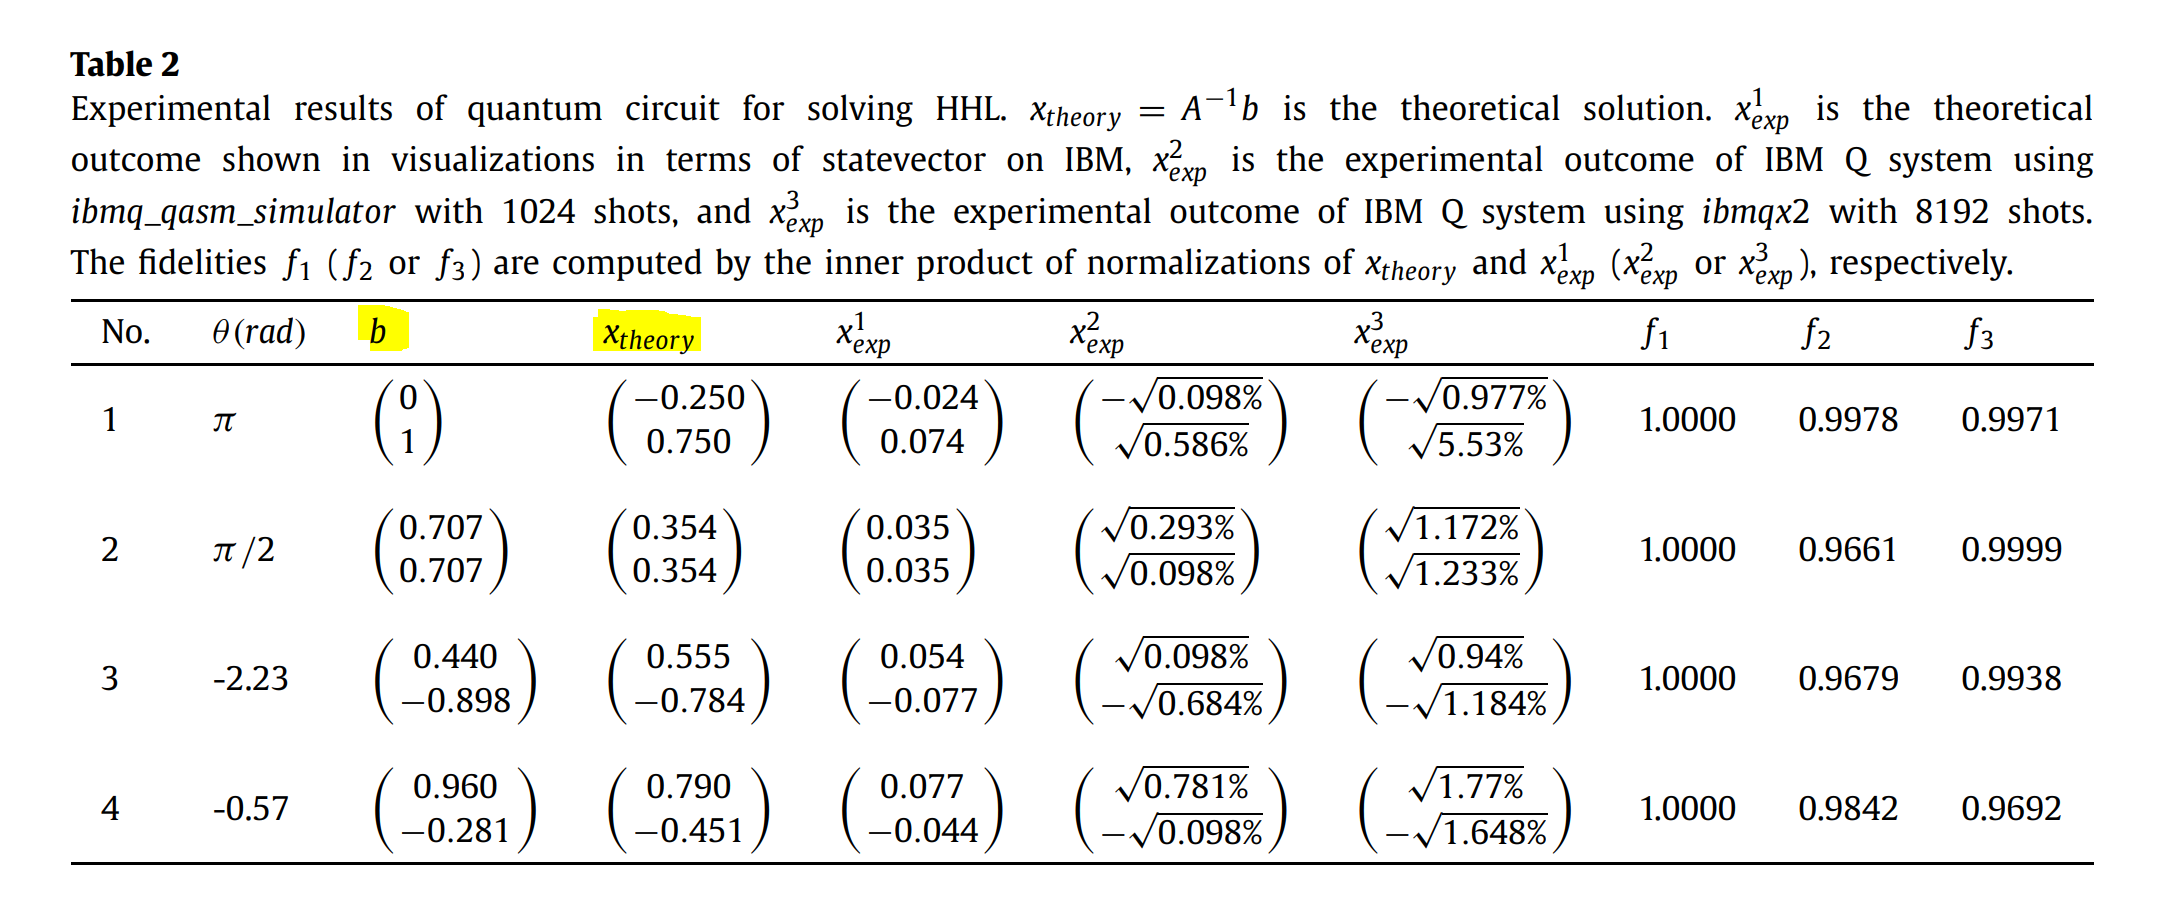

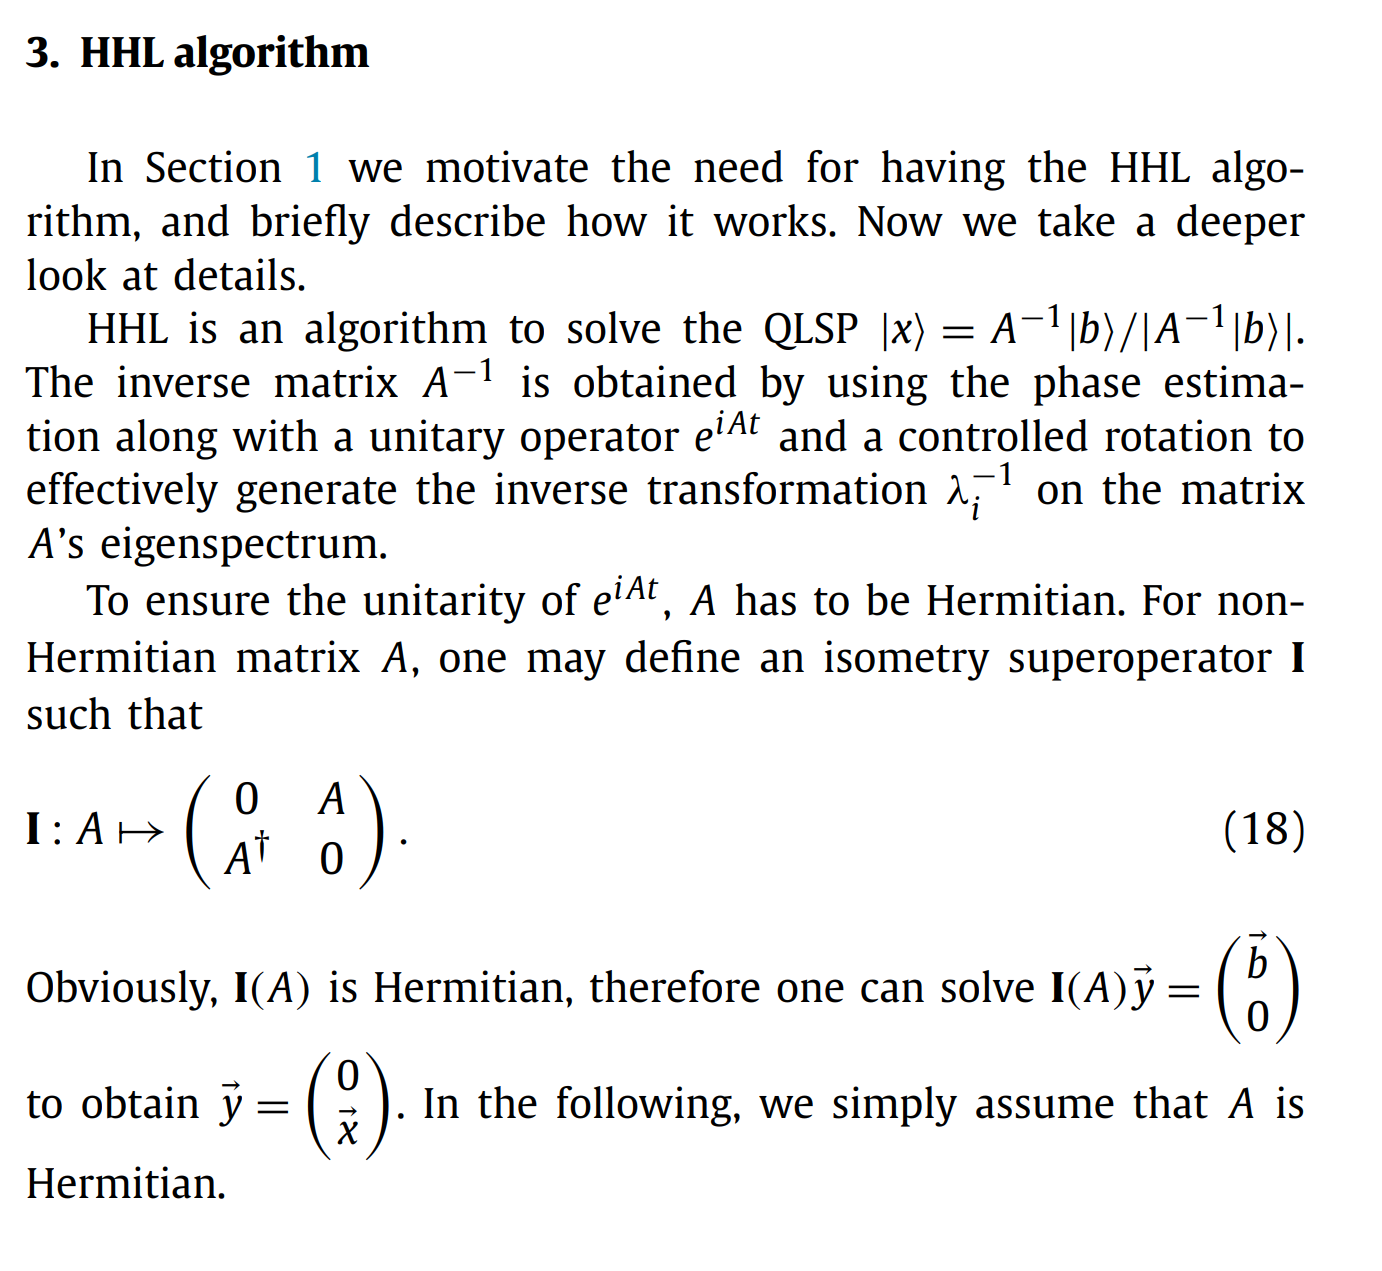

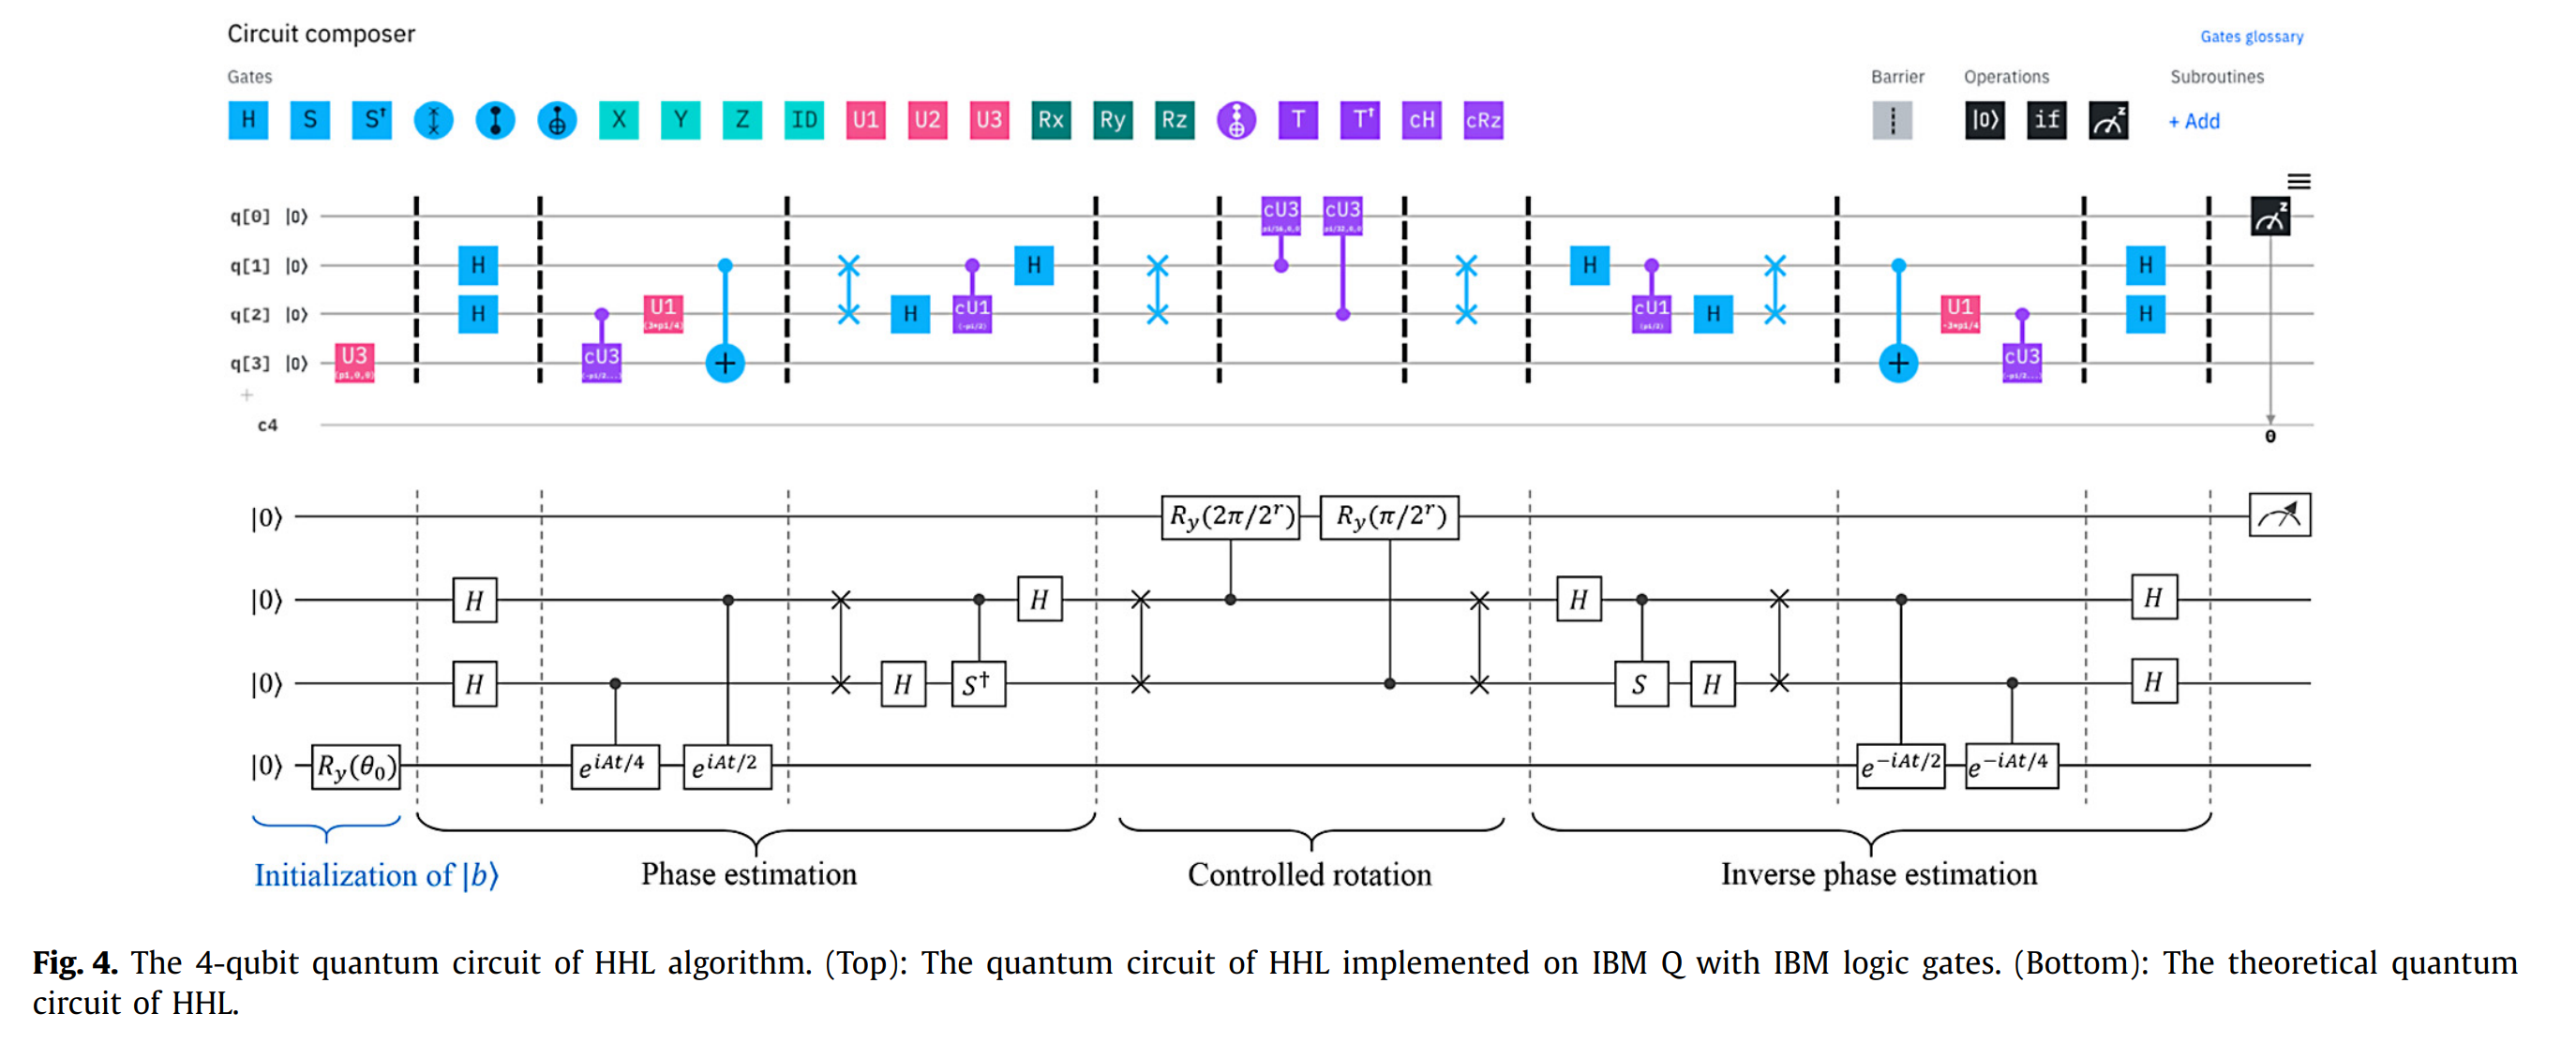

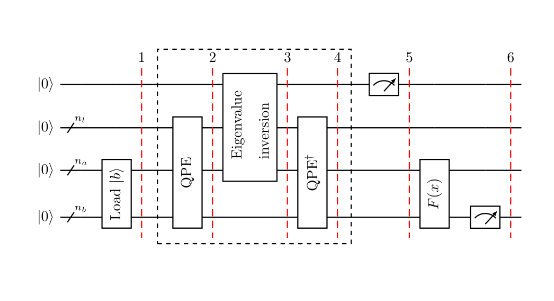

#  |b> and A are not derived from the same data.


1.   Quantum support vector machine (QSVM)
2.   quantum linear regression
3.   quantum singular value decomposition (QSVD)
Dimension of A matrix equals to that of |b>.
Similar to the HHL case, the input Hermitian matrix A is used
to generate the unitary matrix e(iAt) and applied to the input |b>.

#  |b> and A are derived from the same data.


1.   quantum principle component analysis (QPCA)
2.   quantum singular value thresholding (QSVT)
3.   quantum recommendation system (QRS)

Dimension of A can be smaller than |b>